<a href="https://colab.research.google.com/github/yay14/ANPR-System/blob/main/yolov5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

In [ ]:
os.chdir('/content/drive/MyDrive/ANPRSystem')
os.getcwd()

'/content/drive/MyDrive/ANPRSystem'

In [ ]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 6294, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 6294 (delta 41), reused 59 (delta 24), pack-reused 6205
Receiving objects: 100% (6294/6294), 8.54 MiB | 8.46 MiB/s, done.
Resolving deltas: 100% (4300/4300), done.
/content/drive/MyDrive/ANPR System/yolov5


In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
os.chdir('/content/drive/MyDrive/ANPRSystem/yolov5')
os.getcwd()

'/content/drive/MyDrive/ANPRSystem/yolov5'

In [9]:
%%writefile dataset.yaml
train: /content/drive/MyDrive/ANPRSystem/dataset/train/train.txt
val: /content/drive/MyDrive/ANPRSystem/dataset/train/val.txt
test: /content/drive/MyDrive/ANPRSystem/dataset/test/images

nc: 1

names: ['license_plate']

Overwriting dataset.yaml


In [ ]:
%cd models
!cat yolov5s.yaml
%cd ..

/content/drive/My Drive/ANPR System/yolov5/models
# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, C3, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4]

In [ ]:
pip install wandb

In [ ]:
!python train.py --batch 32 --epochs 100  --data dataset.yaml --weights yolov5s.pt --cache

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 2021-5-15 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Namespace(adam=False, artifact_alias='latest', batch_size=32, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='dataset.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=32, upload_dataset=False, weights='yolov5s.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-05-15 15:55:23.333086: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic libra

In [ ]:
try:
 from PIL import Image
except ImportError:
 import Image


In [ ]:
os.getcwd()

'/content/drive/MyDrive/ANPRSystem/yolov5'

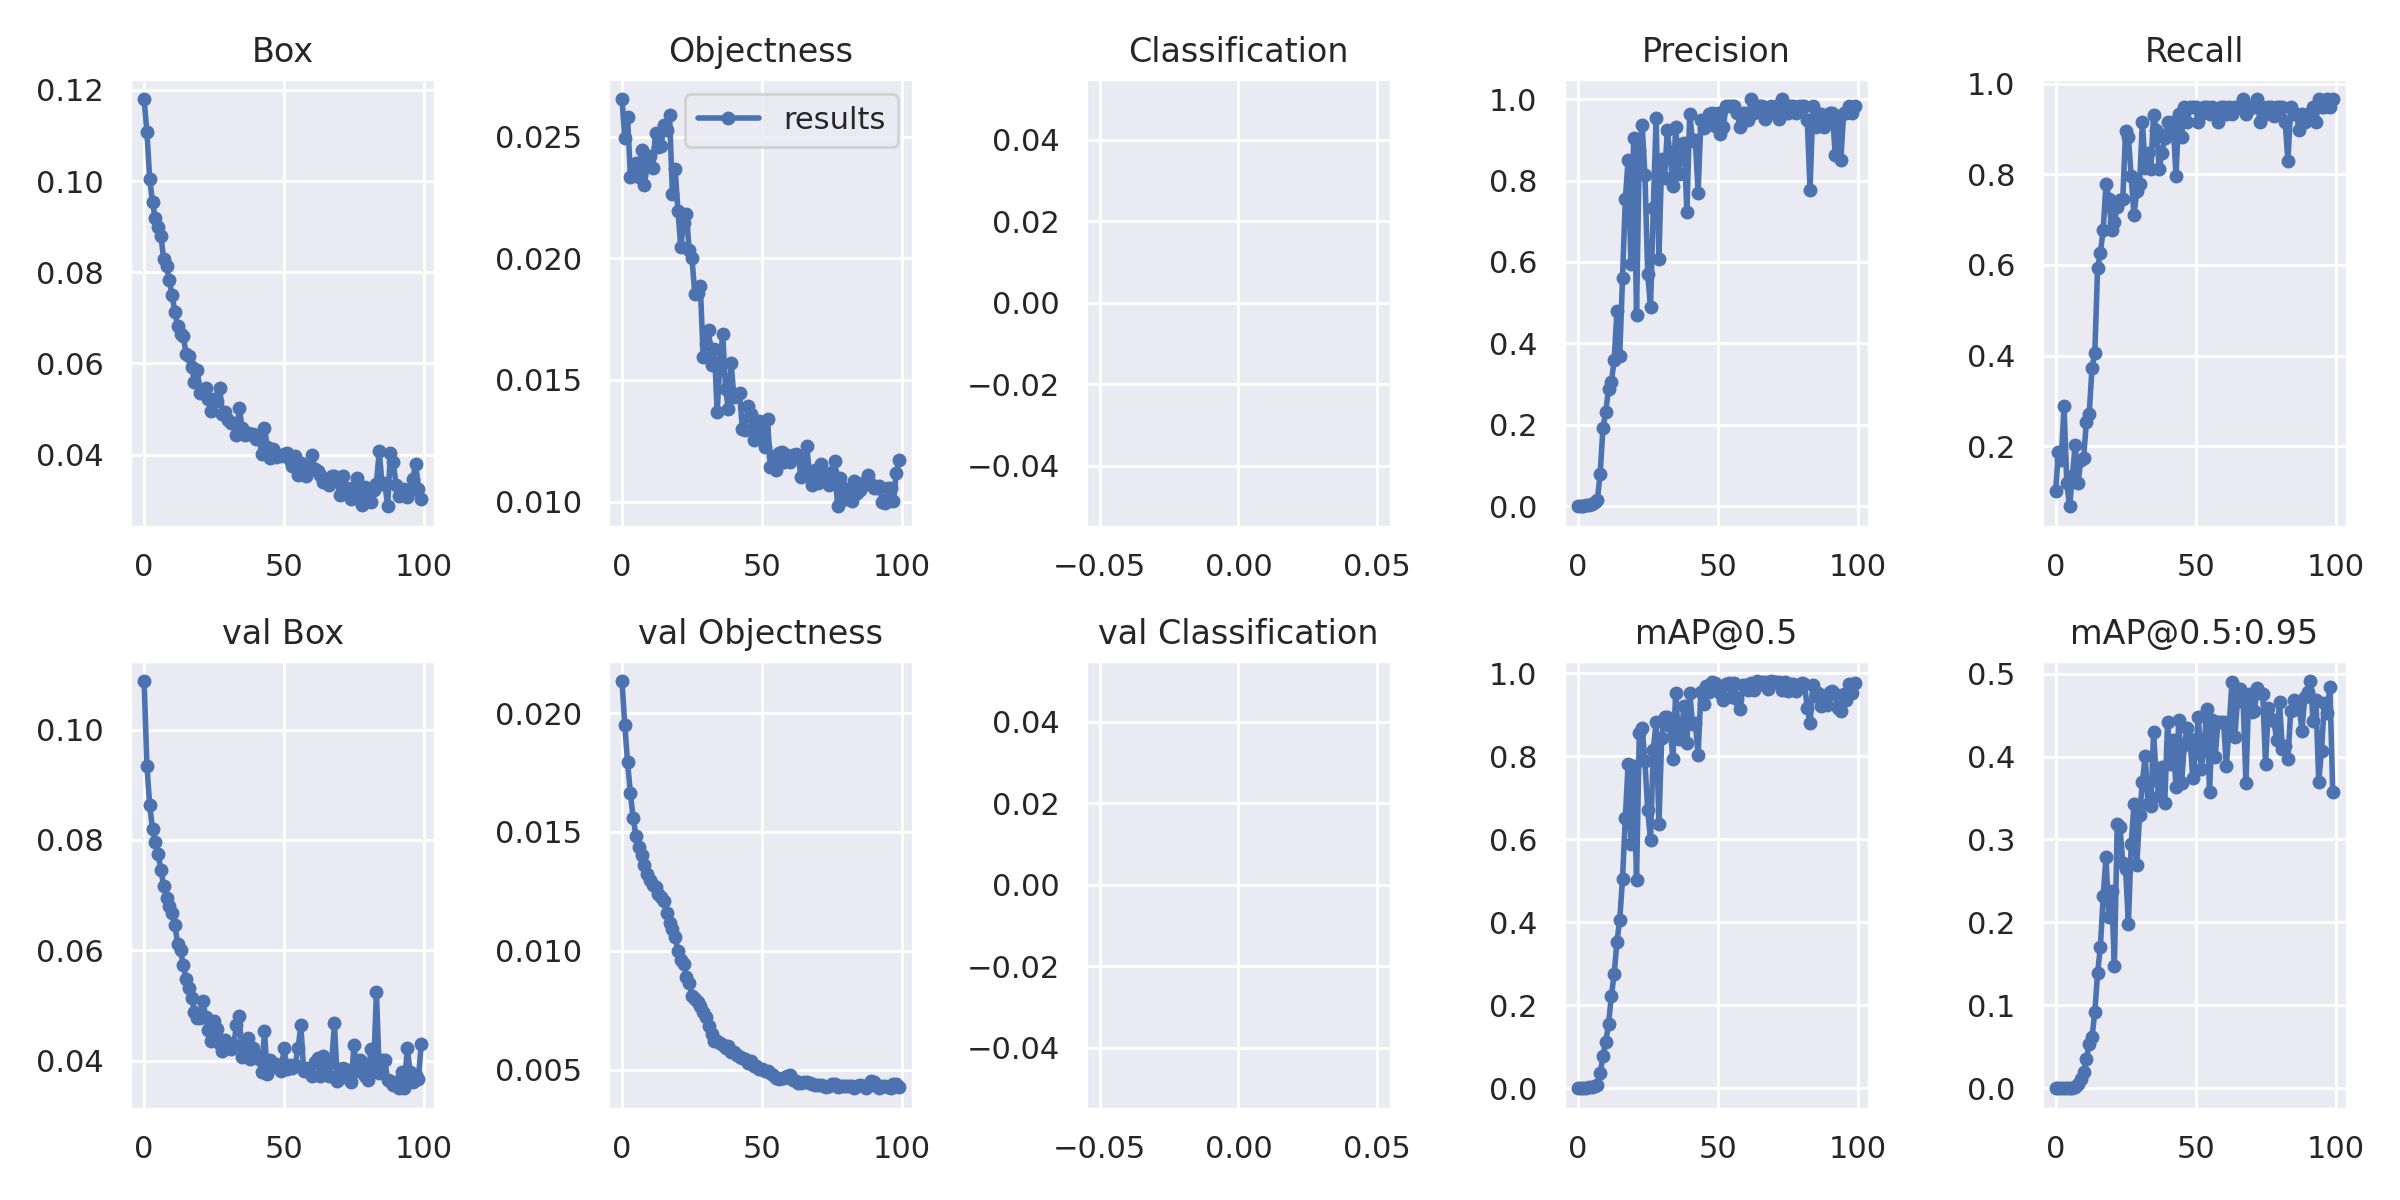

In [ ]:
image= Image.open('/content/drive/MyDrive/ANPR System/yolov5/runs/train/exp/results.png')
image

In [ ]:
test_img='/content/drive/MyDrive/ANPRSystem/dataset/test/images/licensed_car10.png'

!python detect.py --source {test_img} --weights /content/drive/MyDrive/ANPRSystem/yolov5/runs/train/exp/weights/best.pt --save-txt --exist-ok


Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=True, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=True, source='/content/drive/MyDrive/ANPRSystem/dataset/test/images/licensed_car10.png', update=False, view_img=False, weights=['/content/drive/MyDrive/ANPRSystem/yolov5/runs/train/exp/weights/best.pt'])
YOLOv5 🚀 v5.0-91-g17b0f71 torch 1.8.1+cu101 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/drive/MyDrive/ANPRSystem/dataset/test/images/licensed_car10.png: 448x640 1 license_plate, Done. (0.033s)
Results saved to runs/detect/exp
1 labels saved to runs/detect/exp/labels
Done. (0.103s)


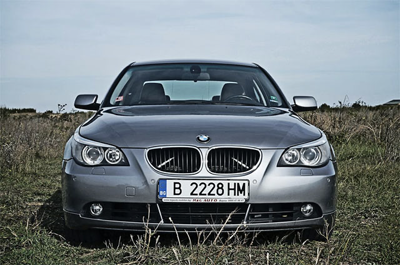

In [ ]:
image= Image.open(test_img)
image

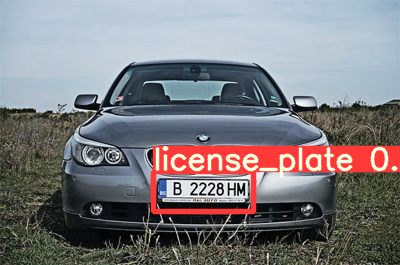

In [ ]:
output='/content/drive/MyDrive/ANPRSystem/yolov5/runs/detect/exp/licensed_car10.png'
image= Image.open(output)
image

In [ ]:
PATH='dataset/test'

def decode_yolo_format(img_name,width,height):
    
    img_result_path=f'./yolov5/runs/detect/exp/labels/{img_name}.txt'
    
    #creates a file if not exists
    if not os.path.exists(img_result_path):
        with open(img_result_path, 'w'): pass
        
    label_file=open(img_result_path)
    
    labels=label_file.readlines()
    f=open(f'{PATH}/bounding_boxes_pred/{img_name}.txt','w')
    
    for label in labels:
        s=label.replace('\n','').split(' ')
        s=[ float(i) for i in s]

        bottom_x=((2*s[1]+s[3])/2)
        top_x=bottom_x-s[3]

        bottom_y=((2*s[2]+s[4])/2)
        top_y=bottom_y-s[4]

        top_x=int(top_x*width)
        bottom_x=int(bottom_x*width)

        top_y=int(top_y*height)
        bottom_y=int(bottom_y*height)

        conf=s[5]
        
        f.write(f'0 {conf} {top_x} {top_y} {bottom_x} {bottom_y} \n')
    
    f.close()
    label_file.close()

In [ ]:
#extracting bounding box of each image to calculate mAP of yolo
for img in os.listdir(f'{PATH}/images'):
    
    #extracting file name, eg: Car1 from Car1.png
    f_name=img.split('.')[0]
    
    #get image size
    img_path=f'{PATH}/images/{img}'
    width,height=Image.open(img_path).size   
    
    #getting predicting bounding box
    decode_yolo_format(f_name,width,height)

In [10]:
!python test.py --weights /content/drive/MyDrive/ANPRSystem/yolov5/runs/train/exp/weights/best.pt --data dataset.yaml --exist-ok --verbose --task test --single-cls

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='dataset.yaml', device='', exist_ok=True, img_size=640, iou_thres=0.6, name='exp', project='runs/test', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=True, task='test', verbose=True, weights=['/content/drive/MyDrive/ANPRSystem/yolov5/runs/train/exp/weights/best.pt'])
YOLOv5 🚀 2021-5-15 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7053910 parameters, 0 gradients
test: Scanning '/content/drive/MyDrive/ANPRSystem/dataset/test/labels' images and labels... 103 found, 0 missing, 0 empty, 0 corrupted: 100% 103/103 [00:49<00:00,  2.10it/s]
test: New cache created: /content/drive/MyDrive/ANPRSystem/dataset/test/labels.cache
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 4/4 [00:03<00:00,  1.25it/s]
                 all         103         103       0.951       0.951       0.946       0.428
Speed: 4.8

In [ ]:
!git clone https://github.com/Cartucho/mAP

Cloning into 'mAP'...
remote: Enumerating objects: 908, done.
remote: Total 908 (delta 0), reused 0 (delta 0), pack-reused 908
Receiving objects: 100% (908/908), 14.71 MiB | 18.06 MiB/s, done.
Resolving deltas: 100% (321/321), done.
Checking out files: 100% (269/269), done.


In [ ]:
import shutil
    
#move all files from one directory to another
def move_all_files(source_dir,target_dir):

    file_names = os.listdir(source_dir)

    for file_name in file_names:
        shutil.copy(os.path.join(source_dir, file_name), target_dir)

In [ ]:
def clear_dir(dir):
    
    for f in os.listdir(dir):
        os.remove(os.path.join(dir,f))

In [ ]:
clear_dir('./mAP/input/ground-truth/')
clear_dir('./mAP/input/detection-results/')
clear_dir('./mAP/input/images-optional/')

#moving ground truth files
move_all_files('./dataset/test/bounding_boxes/','./mAP/input/ground-truth/')

#moving yolo predictions
move_all_files('./dataset/test/bounding_boxes_pred/','./mAP/input/detection-results/')

#moving images(optional)
move_all_files('./dataset/test/images/','./mAP/input/images-optional/')

In [ ]:
%qtconsole
%matplotlib notebook

In [ ]:
!python ./mAP/main.py

: cannot connect to X server 


In [ ]:
!python test.py --weights runs/train/exp3/weights/best.pt --data dataset.yaml --exist-ok --verbose --task test
 --single

python3: can't open file 'test.py': [Errno 2] No such file or directory


In [ ]:
4/1AY0e-g5gR700ZaOvGwPo9lX7FSsVYPix8EKbG4sVP9VAsPIhQ7PJwgnBoZ8